<a href="https://colab.research.google.com/github/wlachape/MAT-421/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 3

Import Packages

In [6]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

Calculating The Friends Income Using Lagrange

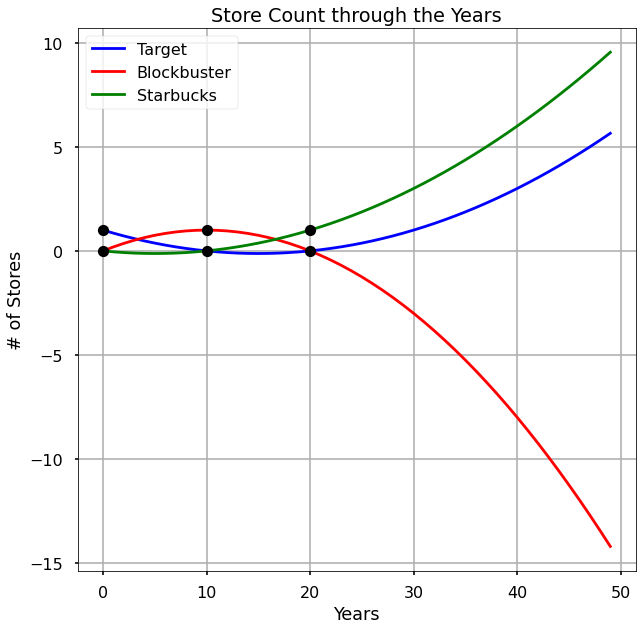

In [32]:
# input x and y values, x being years
x = [0, 10, 20]
y = [5, 15, 10]
# after computing the respective coefficients put them here for the lines to be graphed
Line_1_coeff = [1,-3/20,1/200]
Line_2_coeff = [0, 1/5,-1/100]
Line_3_coeff = [0,-1/20,1/200]
# command for plotting the polynomials
Line_1 = poly.Polynomial(Line_1_coeff)
Line_2 = poly.Polynomial(Line_2_coeff)
Line_3 = poly.Polynomial(Line_3_coeff)

x_new = np.arange(0, 50, 1)
# organization of the lines by color with key
fig = plt.figure(figsize = (10,10))
plt.plot(x_new, Line_1(x_new), 'b', label = 'Target')
plt.plot(x_new, Line_2(x_new), 'r', label = 'Blockbuster')
plt.plot(x_new, Line_3(x_new), 'g', label = 'Starbucks')
# organization of the plot itself and commands to output it
plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Store Count through the Years')
plt.xlabel('Years')
plt.ylabel('# of Stores')
plt.grid()
plt.legend()
plt.show()

Point Test for Lagrange Basis Polynomial (Blockbuster)

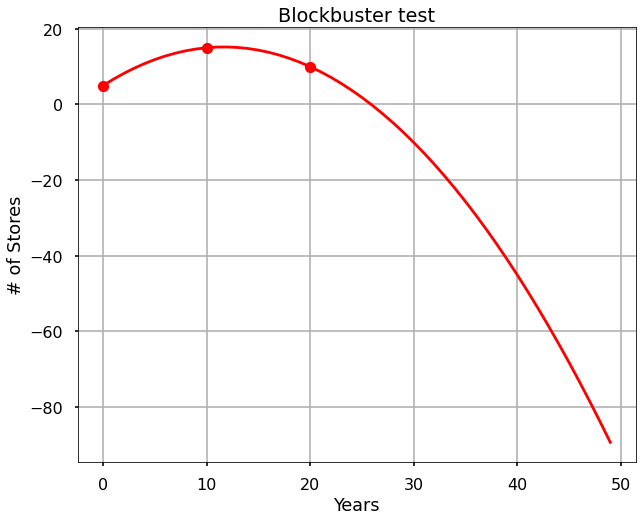

In [33]:
# Test for the blockbuster plot line
L = 5*Line_1 + 15*Line_2 + 10*Line_3
# organization of the plot itself and commands to output it
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'r', x, y, 'ro')
plt.title('Blockbuster test')
plt.grid()
plt.xlabel('Years')
plt.ylabel('# of Stores')
plt.show()

Scipy Lagrange Interpolation

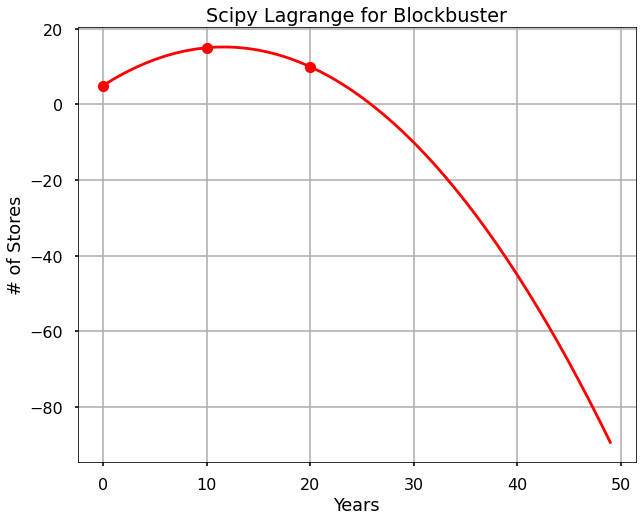

In [22]:
from scipy.interpolate import lagrange
# using a different format to plot lagrange polynomials
f = lagrange(x, y)
# organization of the plot itself and commands to output it
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'r', x, y, 'ro')
plt.title('Scipy Lagrange for Blockbuster')
plt.grid()
plt.xlabel('Years')
plt.ylabel('# of Stores')
plt.show()

Calculating the Speed Limit Using Newton's Polynomial Interpolation

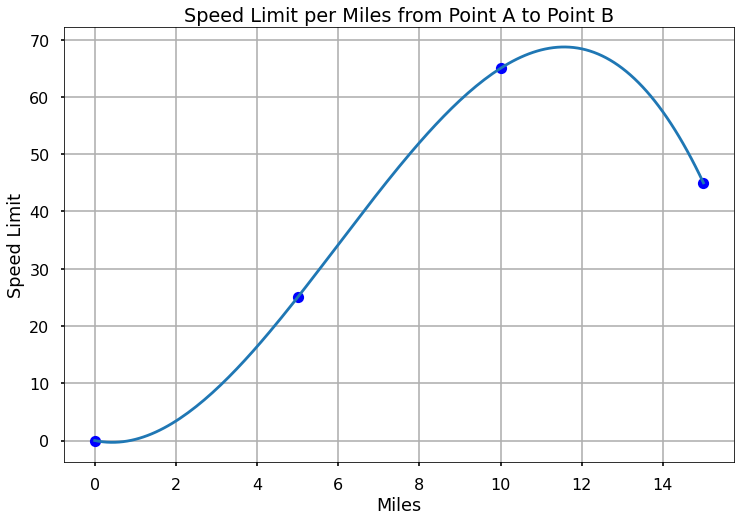

In [52]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

def divided_diff(x, y):
 '''
 function to calculate the divided
 differences table
 '''
 n = len(y)
 coef = np.zeros([n, n])
 # the first column is y
 coef[:,0] = y

 for j in range(1,n):
  for i in range(n-j):
    coef[i][j] = \
    (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

 return coef
def newton_poly(coef, x_data, x):
 '''
 evaluate the newton polynomial
 at x
 '''
 n = len(x_data) - 1
 p = coef[n]
 for k in range(1,n+1):
  p = coef[n-k] + (x -x_data[n-k])*p
 return p

x = np.array([0, 5, 10, 15])
y = np.array([0, 25, 65, 45])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]
# evaluate on new data points
x_new = np.arange(0, 15.1, .1)
y_new = newton_poly(a_s, x, x_new)
plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.title('Speed Limit per Miles from Point A to Point B')
plt.grid()
plt.xlabel('Miles')
plt.ylabel('Speed Limit')
plt.show()